In [1]:
import pandas as pd

# 데이터 불러오기
df = pd.read_csv("/home/wooyeon/Index_tracking_with_cardinality/school_safety/사고장소별_세부.csv")
# 데이터 확인하기
print(df.head())

  구분    연도   운동장  체육시설  놀이시설  교문/담장   화단  구령대(스탠드)   계단  급수대  ...  출입문/현관  \
0  초  2019  8606   714  2334    255  495       431  609   42  ...     971   
1  초  2020  1544   176   448     67   93        92  104   19  ...     209   
2  초  2021  3806   459  1034    169  235       198  212   21  ...     384   
3  초  2022  8077   829  2060    313  500       320  500   31  ...     648   

    기타.3  등하굣길  수련시설(야영장)  실험/실습장  체험학습장  운동경기장  자동차(선박/항공기/기차)안  해외  기타.4  
0  530.0   324         70      16    648    396               29   0   422  
1   37.0   160          4       0     57     74                1   0    74  
2    1.0   339          6       4    201    120                5   0   148  
3    NaN   381         21      20    611    288               12   0   485  

[4 rows x 40 columns]


In [2]:
# 중복되는 컬럼 합치기
df['계단'] = df['계단'] + df['계단.1'] 
df['기타'] = df['기타'] + df['기타.1'] + df['기타.2'] + df['기타.3'] + df['기타.4'] 

# 합치기 전 컬럼 삭제
df.drop(['계단.1','기타.1','기타.2','기타.3','기타.4','구분'],axis=1,inplace=True)

In [3]:
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt

# 한글 사용 패키지
font_path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'  # 설치된 NanumGothic 폰트 경로
font_manager.fontManager.addfont(font_path)
plt.rcParams['font.family'] = 'NanumGothic'

In [4]:
df.head()
# 연도를 인덱스로 설정
df.set_index(['연도'],inplace=True)
df.head()

,운동장,체육시설,놀이시설,교문/담장,화단,구령대(스탠드),계단,급수대,배수구(맨홀),기타,...,컴퓨터실,복도,출입문/현관,등하굣길,수련시설(야영장),실험/실습장,체험학습장,운동경기장,자동차(선박/항공기/기차)안,해외
연도,,,,,,,,,,,,,,,,,,,,,
2019,8606,714,2334,255,495,431,5112,42,75,6107.0,...,71,4645,971,324,70,16,648,396,29,0
2020,1544,176,448,67,93,92,1247,19,13,966.0,...,30,891,209,160,4,0,57,74,1,0
2021,3806,459,1034,169,235,198,3093,21,25,1626.0,...,43,2180,384,339,6,4,201,120,5,0
2022,8077,829,2060,313,500,320,5156,31,65,NaN,...,42,4121,648,381,21,20,611,288,12,0


In [5]:
# 막대그래프로 표현할 연도 설정
year=2019

In [11]:
# 데이터에서 해당 연도만 가져오기
df_year = df.loc[[year]]
df_year.head()


,운동장,체육시설,놀이시설,교문/담장,화단,구령대(스탠드),계단,급수대,배수구(맨홀),기타,...,컴퓨터실,복도,출입문/현관,등하굣길,수련시설(야영장),실험/실습장,체험학습장,운동경기장,자동차(선박/항공기/기차)안,해외
연도,,,,,,,,,,,,,,,,,,,,,
2019,8606,714,2334,255,495,431,5112,42,75,6107.0,...,71,4645,971,324,70,16,648,396,29,0


In [12]:
# 개수가 많은 순서대로 정렬
df_sorted = df_year.T.sort_values(by=year,ascending=False).T

Text(0.5, 1.0, '2019 초등학교 안전사고 발생 장소(세부)')

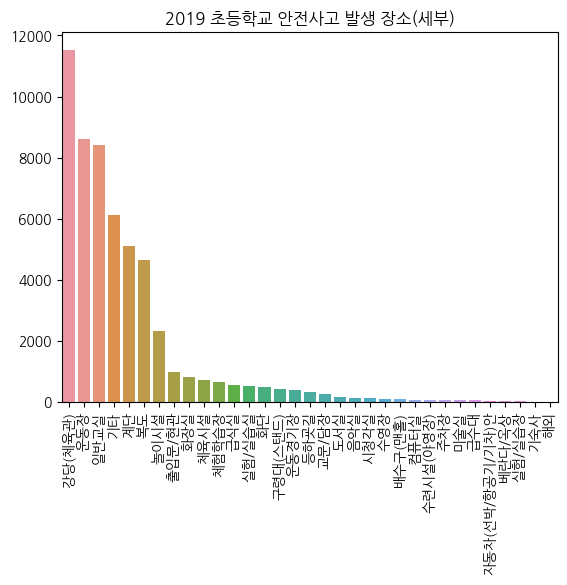

In [13]:
import seaborn as sns

sns.barplot(data=df_sorted,)#,ci=None)
plt.xticks(rotation=90)
plt.title(f'{year} 초등학교 안전사고 발생 장소(세부)')

체육시설               1.513583
교문/담장              0.558733
화단                 0.919408
구령대(스탠드)           0.723434
급수대                0.078528
배수구(맨홀)            0.123700
화장실                1.630333
급식실                1.160552
기숙사                0.003475
주차장                0.109801
수영장                0.081308
도서실                0.509392
베란다/옥상             0.019458
실험/실습실             0.904119
음악실                0.194584
미술실                0.227941
시청각실               0.213347
컴퓨터실               0.129259
출입문/현관             1.537211
등하굣길               0.836710
수련시설(야영장)          0.070189
실험/실습장             0.027798
체험학습장              1.054226
운동경기장              0.610159
자동차(선박/항공기/기차)안    0.032662
해외                 0.000000
dtype: float64


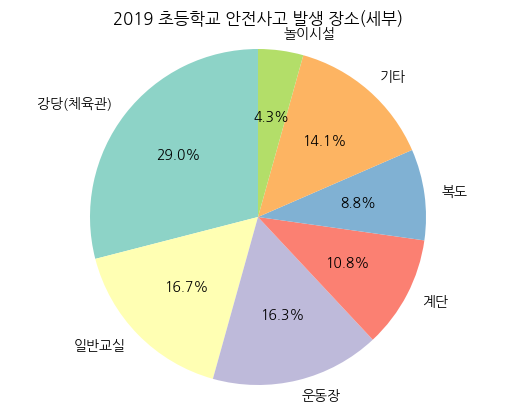

In [10]:
# ! pip install palettable
from palettable.colorbrewer.qualitative import Set3_12

df_sum = df.sum()

# 총합 계산
total = df_sum.sum()

# 10% 미만인 항목 찾기
df_sum_percentage = df_sum / total * 100
df_small = df_sum_percentage[df_sum_percentage < 3]
df_large = df_sum_percentage[df_sum_percentage >= 3]
print(df_small)

# '기타' 항목 추가
other_sum = df_small.sum()


# 비율 순서대로 정렬
df_combined = df_large.sort_values(ascending=False)

df_combined['기타'] = other_sum

# 색상 팔레트 선택
# colors = sns.color_palette('colorblind', len(df_combined))
colors = Set3_12.hex_colors

# 파이차트 그리기
fig, ax = plt.subplots()
ax.pie(df_combined, labels=df_combined.index, autopct='%1.1f%%', startangle=90, colors=colors)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title(f'{year} 초등학교 안전사고 발생 장소(세부)')
plt.show()

In [14]:
# 계단과 복도 컬럼 합치기
df['계단 및 복도'] = df['계단'] + df['복도']
# 기존 게단과 복도는 삭제
df.drop(['계단', '복도'],axis=1,inplace=True)

In [35]:
# 막대그래프로 표현할 연도 설정
year = 2022

In [36]:
df_year = df.loc[[year]]
df_year.head()

,운동장,체육시설,놀이시설,교문/담장,화단,구령대(스탠드),급수대,배수구(맨홀),기타,화장실,...,컴퓨터실,출입문/현관,등하굣길,수련시설(야영장),실험/실습장,체험학습장,운동경기장,자동차(선박/항공기/기차)안,해외,계단 및 복도
연도,,,,,,,,,,,,,,,,,,,,,
2022,8077,829,2060,313,500,320,31,65,NaN,874,...,42,648,381,21,20,611,288,12,0,9277


In [37]:
# 개수가 많은 순서대로 정렬
df_sorted = df_year.T.sort_values(by=year,ascending=False).T

Text(0.5, 1.0, '2022 초등학교 안전사고 발생 장소(세부)')

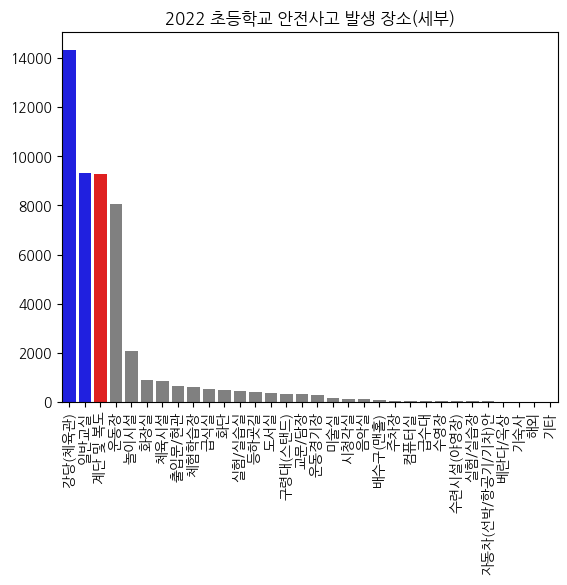

In [39]:
import seaborn as sns

series = df_year.loc[year]
# colors = ['blue', 'red', 'blue'] + ['grey'] * (len(series) - 3)
colors = ['blue', 'blue', 'red'] + ['grey'] * (len(series) - 3)
sns.barplot(data=df_sorted,palette=colors)#,ci=None)
plt.xticks(rotation=90)
plt.title(f'{year} 초등학교 안전사고 발생 장소(세부)')